# Dados para análise de sentimentos

O objetivo  é o treinamento de um classificador focado para avaliar o sentimento dos usários de mapas.
O repositório correspondente a essa implementação é  clonado do github para utilização do dataset contido no arquivo ".csv" através da biblioteca Pandas.

### Importar os dados para treinar o modelo do GitHub e comentarios sobre aplicativos de mapeamento disponíveis na Play Store


* Objetivo foi treinar um classificador.
* O repositório com os parametros é clonado do GitHub.
* Utilização do dataset em formato ".csv" com a biblioteca Pandas.


In [1]:
!git clone https://github.com/Data92repository/Data_02_NLP.git


fatal: destination path 'Data_02_NLP' already exists and is not an empty directory.


In [2]:
#!pip install pandas -q

#!pip install openpyxl -q

#!pip install --upgrade pandas -q


In [3]:
import pandas as pd

# Usando pd.read_excel para ler o arquivo .xlsx
data = pd.read_excel('https://raw.githubusercontent.com/Data92repository/Data_02_NLP/refs/heads/master/dataset_realista_analise_sentimento.xlsx').dropna()

data

,Expressão,Classificação
0,É rápido,bom
1,Me localizo facilmente,bom
2,Bom de usar,bom
3,A navegação é aceitável,neutro
4,Os pontos de interesse estão visíveis,neutro
...,...,...
3048,O brilho da tela pode ser ajustado conforme a ...,neutro
3049,A densidade de pixels influencia a resolução d...,neutro
3050,O contraste da tela pode ser ajustado para dif...,neutro
3051,A função de toque é usada para navegação e con...,neutro


In [4]:
data['Classificação'].unique()

array(['bom', 'neutro', 'ruim'], dtype=object)

In [5]:
import pandas as pd

app_reviews_df = data

# Criar um novo DataFrame com as colunas 'Frase' e 'Sentimento'
app_reviews_df_filtered = app_reviews_df[['Expressão', 'Classificação']].copy()

# Renomear as colunas 'Frase' e 'Sentimento' para 'content' e 'score'
app_reviews_df_filtered.rename(columns={'Expressão': 'content', 'Classificação': 'score'}, inplace=True)

# Exibir as primeiras linhas do DataFrame modificado
print(app_reviews_df_filtered.head())

# Salvar o DataFrame filtrado em um novo arquivo CSV com as colunas renomeadas
app_reviews_df_filtered.to_csv('sentimentos.csv', index=False)


                                 content   score
0                               É rápido     bom
1                 Me localizo facilmente     bom
2                            Bom de usar     bom
3                A navegação é aceitável  neutro
4  Os pontos de interesse estão visíveis  neutro


# Instalação do Google Play Scraper
Objetivo: Instala a biblioteca google_play_scraper, que permite coletar dados de aplicativos disponíveis na Google Play Store.

In [6]:
# Install Google Play Scraper to create dataset (https://github.com/JoMingyu/google-play-scraper)
!pip install google_play_scraper -q


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importação de Pacotes Necessários
* Objetivo: Importa diversas bibliotecas que serão utilizadas na análise, como:
* json: Para manipulação de dados no formato JSON.
* pandas: Para manipulação e análise de dados em formato tabular (DataFrame).
* tqdm: Para mostrar uma barra de progresso durante a execução de loops.
* seaborn e matplotlib.pyplot: Para visualização de dados.
* pygments: Para realce de sintaxe ao exibir código JSON no terminal.
* google_play_scraper: Para coletar dados dos aplicativos.

In [7]:
# Instalar todas as dependências necessárias
#!pip install pandas tqdm seaborn matplotlib pygments google-play-scraper -q


In [8]:
# Import some required packages
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Identificação de Aplicativos de Mobilidade
* A lista inclui aplicativos populares como Google Maps, Waze, Uber e Citymapper, entre outros

In [9]:
#apps_ids = ['com.google.android.apps.maps', 'com.waze', 'com.here.app.maps', 'com.taxis99', 'com.cabify.rider', 'com.ubercab', 'com.tranzmate', 'com.citymapper.app.release']

In [10]:
apps_ids = [
    'net.osmand',
    'com.google.android.apps.maps',
    'com.mapswithme.maps.pro',
    'com.waze', 
    'com.here.app.maps',
    'com.wikiloc.wikilocandroid',
    'com.Avenza',
    'com.ndrive.oimapas',
    'com.alltrails.alltrails',
    'com.strava'
]


# Coleta de Dados dos Aplicativos
* Objetivo: Para cada aplicativo na lista apps_ids, o código coleta informações utilizando a função app() do google_play_scraper.
* A coleta exclui os comentários dos aplicativos para focar nas informações principais, que serão armazenadas em uma lista app_infos.

In [11]:
# Scraping data for each app
app_infos = []

for ap in tqdm(apps_ids):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


# Exibição das Informações Coletadas
* Objetivo: Converte a lista app_infos em um DataFrame do pandas e exibe as primeiras linhas desse DataFrame, permitindo uma visualização clara das informações coletadas sobre os aplicativos.

In [12]:
# Show info
import pandas as pd

app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head()

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,contentRating,contentRatingDescription,adSupported,containsAds,released,lastUpdatedOn,updated,version,appId,url
0,OsmAnd — Maps & GPS Offline,OsmAnd is an offline world map application bas...,OsmAnd is an offline world map application bas...,Navigation on hikes is no longer a problem. Do...,"10,000,000+",10000000,12632465,4.457050,204954,2956,...,Everyone,None,False,False,"Aug 16, 2010","Dec 12, 2024",1734034128,4.9.10,net.osmand,https://play.google.com/store/apps/details?id=...
1,Google Maps,Navigate your world faster and easier with Goo...,Navigate your world faster and easier with Goo...,Real-time GPS navigation & local suggestions f...,"10,000,000,000+",10000000000,17091283715,3.700753,18532433,661306,...,Everyone,None,True,True,None,"Jan 15, 2025",1736952996,Varies with device,com.google.android.apps.maps,https://play.google.com/store/apps/details?id=...
2,MAPS.ME: Offline maps GPS Nav,"Fast, detailed and entirely offline maps with ...","Fast, detailed and entirely offline maps with ...",Worldwide offline navigation with maps and dri...,"50,000,000+",50000000,86358387,4.112150,1276593,13429,...,Everyone,None,False,False,"Jul 31, 2012","Jan 9, 2025",1736421227,v16.1.71793-googleRelease,com.mapswithme.maps.pro,https://play.google.com/store/apps/details?id=...
3,Waze Navigation & Live Traffic,Know what's ahead on the road with the help fr...,Know what&#39;s ahead on the road with the hel...,"Avoid delays. Get real-time GPS navigation, sa...","500,000,000+",500000000,558044098,4.238448,8780489,637243,...,Everyone,None,True,True,None,"Jan 1, 2025",1735723011,Varies with device,com.waze,https://play.google.com/store/apps/details?id=...
4,HERE WeGo: Maps & Navigation,Welcome to the new HERE WeGo!\r\n \r\nHERE WeG...,Welcome to the new HERE WeGo!<br> <br>HERE WeG...,Enjoy the journey,"10,000,000+",10000000,37624218,2.945159,500190,8976,...,Everyone,None,False,False,"Oct 9, 2014","Dec 4, 2024",1733334692,4.14.200,com.here.app.maps,https://play.google.com/store/apps/details?id=...



# Coleta de Avaliações de Aplicativos

* O código coleta uma determinada quantidade de avaliações de cada aplicativo da lista apps_ids, com progresso visível via tqdm.

* As avaliações são armazenadas na lista app_reviews.
* Você pode definir a quantidade de avaliações.

In [13]:
#!pip install ipywidgets -q

In [14]:
import ipywidgets as widgets
from IPython.display import display

# Cria uma caixa de entrada para o número de avaliações, sem valor inicial específico
max_reviews_widget = widgets.IntText(
    value=200000,  # O usuário poderá modificar esse valor livremente
    description='Avaliações:',
    disabled=False
)

display(max_reviews_widget)


IntText(value=200000, description='Avaliações:')

In [15]:
from tqdm import tqdm
from IPython.display import display


# Função para coletar avaliações com base no número inserido no widget
def coletar_avaliacoes(max_reviews):
    app_reviews = []

    for app_id in tqdm(apps_ids):
        collected_reviews = 0  # Contador de avaliações coletadas

        while collected_reviews < max_reviews:
            for score in range(1, 6):
                # Determinar quantas avaliações coletar
                count = 100 if score == 3 else 50

                for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
                    # Chamada para coletar avaliações
                    rvs, _ = reviews(
                        app_id,
                        lang='pt',
                        country='br',
                        sort=sort_order,
                        count=count,
                        filter_score_with=score
                    )

                    # Adicionar avaliações à lista
                    for r in rvs:
                        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                        r['appId'] = app_id
                        app_reviews.append(r)

                    # Atualizar contador de avaliações coletadas
                    collected_reviews += len(rvs)

                    # Parar se já coletou a quantidade desejada
                    if collected_reviews >= max_reviews:
                        break

                if collected_reviews >= max_reviews:
                    break

    return app_reviews

# Executa a coleta de avaliações com o valor selecionado no widget
app_reviews = coletar_avaliacoes(max_reviews_widget.value)


100%|██████████| 10/10 [2:57:41<00:00, 1066.19s/it]


In [16]:
app_reviews_df = pd.DataFrame(app_reviews)

#app_reviews_df.head()

In [17]:
# Total de avaliações
len(app_reviews)

2000044

# Mapeamento de Avaliações e Exportação de Dados

1. **Mapeamento de Classificações**: O código define um dicionário chamado `score_map` que mapeia os valores numéricos das avaliações (de 1 a 5) para palavras descritivas, como: 1 e 2 "ruim"; 3 "neutro"; 4 e 5 "bom".

2. **Criação e Modificação do DataFrame**: Um novo DataFrame (`app_reviews_df_filtered`) é criado a partir de colunas selecionadas do DataFrame original (`app_reviews_df`). Os valores da coluna 'score' são substituídos pelas palavras correspondentes usando o mapeamento definido.

3. **Exibição e Exportação**: As primeiras linhas do DataFrame modificado são exibidas, e o DataFrame resultante é salvo em um novo arquivo CSV chamado 'app_reviews_filtered.csv', facilitando a análise posterior e a visualização dos dados.

In [18]:
"""
!pip install xlsxwriter -q
import pandas as pd
import xlsxwriter # Import the xlsxwriter library
import os

# Mapeamento dos valores de score para palavras
score_map = {
    1: 'ruim',
    2: 'ruim',
    3: 'neutro',
    4: 'bom',
    5: 'bom'
}

# Criando um novo DataFrame com as colunas 'content' e 'score'
app_reviews_df_filtered = app_reviews_df[['content', 'score']].copy()

# Substituindo os valores da coluna 'score' pelas palavras
app_reviews_df_filtered['score'] = app_reviews_df_filtered['score'].map(score_map)

# Salvar o DataFrame como CSV automaticamente
csv_filename = "app_reviews_filtered.csv"
app_reviews_df_filtered.to_csv(csv_filename, index=False, encoding='utf-8')
print(f"Arquivo CSV salvo como: {csv_filename}")

# Salvar o DataFrame como XLSX automaticamente
xlsx_filename = "app_reviews_filtered.xlsx"
with pd.ExcelWriter(xlsx_filename, engine='xlsxwriter') as writer:
    app_reviews_df_filtered.to_excel(writer, index=False, sheet_name='Sheet1')
print(f"Arquivo XLSX salvo como: {xlsx_filename}")

# Baixar arquivos (exemplo para Google Colab ou Jupyter Notebook)
try:
    from google.colab import files  # Google Colab
    files.download(csv_filename)
    files.download(xlsx_filename)
except ImportError:
    # Para Jupyter ou sistemas locais, mova os arquivos para uma pasta acessível
    output_dir = os.path.expanduser("~/Downloads")
    os.rename(csv_filename, os.path.join(output_dir, csv_filename))
    os.rename(xlsx_filename, os.path.join(output_dir, xlsx_filename))
    print(f"Arquivos movidos para a pasta de downloads: {output_dir}")

    """

'\n!pip install xlsxwriter -q\nimport pandas as pd\nimport xlsxwriter # Import the xlsxwriter library\nimport os\n\n# Mapeamento dos valores de score para palavras\nscore_map = {\n    1: \'ruim\',\n    2: \'ruim\',\n    3: \'neutro\',\n    4: \'bom\',\n    5: \'bom\'\n}\n\n# Criando um novo DataFrame com as colunas \'content\' e \'score\'\napp_reviews_df_filtered = app_reviews_df[[\'content\', \'score\']].copy()\n\n# Substituindo os valores da coluna \'score\' pelas palavras\napp_reviews_df_filtered[\'score\'] = app_reviews_df_filtered[\'score\'].map(score_map)\n\n# Salvar o DataFrame como CSV automaticamente\ncsv_filename = "app_reviews_filtered.csv"\napp_reviews_df_filtered.to_csv(csv_filename, index=False, encoding=\'utf-8\')\nprint(f"Arquivo CSV salvo como: {csv_filename}")\n\n# Salvar o DataFrame como XLSX automaticamente\nxlsx_filename = "app_reviews_filtered.xlsx"\nwith pd.ExcelWriter(xlsx_filename, engine=\'xlsxwriter\') as writer:\n    app_reviews_df_filtered.to_excel(writer, 

In [20]:
!pip install xlsxwriter -q
import pandas as pd
import xlsxwriter  # Import the xlsxwriter library
import os

# Mapeamento dos valores de score para palavras
score_map = {
    1: 'ruim',
    2: 'ruim',
    3: 'neutro',
    4: 'bom',
    5: 'bom'
}

# Criando um novo DataFrame com as colunas 'content' e 'score'
app_reviews_df_filtered = app_reviews_df[['content', 'score']].copy()

# Substituindo os valores da coluna 'score' pelas palavras
app_reviews_df_filtered['score'] = app_reviews_df_filtered['score'].map(score_map)


# Diretório de saída (raiz do projeto ou pasta específica no workspace do VS Code)
output_dir = os.path.abspath(".")  # Diretório atual do script
os.makedirs(output_dir, exist_ok=True)  # Garante que o diretório existe

# Salvar o DataFrame como CSV
csv_filename = os.path.join(output_dir, "app_reviews_filtered.csv")
app_reviews_df_filtered.to_csv(csv_filename, index=False, encoding='utf-8')
print(f"Arquivo CSV salvo como: {csv_filename}")

# Salvar o DataFrame como XLSX
""""
xlsx_filename = os.path.join(output_dir, "app_reviews_filtered.xlsx")
with pd.ExcelWriter(xlsx_filename, engine='xlsxwriter') as writer:
    app_reviews_df_filtered.to_excel(writer, index=False, sheet_name='Sheet1')
print(f"Arquivo XLSX salvo como: {xlsx_filename}")
"""






[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Arquivo CSV salvo como: c:\Users\Vinicius\Desktop\Modelo IA  - PLN\app_reviews_filtered.csv


'"\nxlsx_filename = os.path.join(output_dir, "app_reviews_filtered.xlsx")\nwith pd.ExcelWriter(xlsx_filename, engine=\'xlsxwriter\') as writer:\n    app_reviews_df_filtered.to_excel(writer, index=False, sheet_name=\'Sheet1\')\nprint(f"Arquivo XLSX salvo como: {xlsx_filename}")\n'

In [ ]:
""""
# Mover os arquivos para a pasta de Downloads no sistema operacional
download_dir = os.path.expanduser("~/Downloads")  # Diretório de downloads do sistema
os.rename(csv_filename, os.path.join(download_dir, "app_reviews_filtered.csv"))
os.rename(xlsx_filename, os.path.join(download_dir, "app_reviews_filtered.xlsx"))
print(f"Arquivos movidos para a pasta de downloads: {download_dir}")

"""

In [21]:
#Estrutura do DataFrame Filtrado de Avaliações

app_reviews_df_filtered

,content,score
0,"Cansei. Desinstalei, agora em definitivo. No m...",ruim
1,"Apesar da boa aparência do mapa e rua, a corre...",ruim
2,"O que houve com o suporte de voz? Mostra: "" Nã...",ruim
3,"Comprei a versão paga, mas para baixar os mapa...",ruim
4,"Se você apagar um mapa por engano, o aplicativ...",ruim
...,...,...
2000039,Bom dia. O App está mudando a linguagem sozinh...,ruim
2000040,"Bom para ser uma rede social para atletas, mas...",ruim
2000041,"Tenho o strava a mais de 1 ano, tenho um igpsp...",ruim
2000042,Não define o mapa corretamente,ruim


# Análise de sentmento do arquivo txt


1. **Preparação dos Dados**: Carrega e concatena dois arquivos CSV com avaliações de aplicativos, removendo entradas ausentes e separando textos de sentimentos.

2. **Divisão e Vetorização**: Divide os dados em conjuntos de treino e teste (80%/20%) e utiliza TF-IDF para transformar os textos em representações numéricas.

3. **TF-IDF (Term Frequency-Inverse Document Frequency)**: é uma técnica amplamente utilizada em processamento de linguagem natural e recuperação de informações para avaliar a importância de uma palavra em

4. **Treinamento e Análise**: Treina um classificador de Regressão Logística e implementa funções para analisar o sentimento de novos textos e gerar um arquivo com a análise de sentimento incorporada em cada bloco de texto.

In [78]:
#!pip install scikit-learnc-q


In [22]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re

# 1. Carregar os dois arquivos CSV
app_reviews_df1 = pd.read_csv('app_reviews_filtered.csv')  # Primeiro CSV
app_reviews_df2 = pd.read_csv('sentimentos.csv')           # Segundo CSV

# 2. Concatenar os dois DataFrames
app_reviews_df = pd.concat([app_reviews_df1, app_reviews_df2], ignore_index=True)

# 3. Remover valores NaN na coluna 'content'
app_reviews_df.dropna(subset=['content'], inplace=True)

# 4. Separar as features (texto) e labels (sentimento)
X = app_reviews_df['content']  # Textos
y = app_reviews_df['score']    # Sentimentos:  'ruim', 'neutro', 'bom'

# 5. Dividir o conjunto de dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Vetorizar o texto (transformar em números usando TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)  # Usar as 5000 palavras mais frequentes
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 7. Treinar um classificador (Logistic Regression neste exemplo)
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

# Função para analisar sentimento de um novo texto
def analisar_sentimento(texto):
    texto_tfidf = vectorizer.transform([texto])
    sentimento_pred = classifier.predict(texto_tfidf)
    return sentimento_pred[0]  # Retorna o sentimento previsto

# Função para ler o conteúdo do arquivo linha por linha
def ler_arquivo_linhas(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        linhas = file.readlines()
    return linhas

# Função para analisar o sentimento de cada bloco de texto no formato SRT e gerar um novo arquivo
def gerar_arquivo_com_sentimentos(input_file, output_file):
    linhas = ler_arquivo_linhas(input_file)
    with open(output_file, 'w', encoding='utf-8') as file_out:
        bloco_texto = []
        for linha in linhas:
            if re.match(r'^\d+$', linha.strip()):  # Ignora o número da sequência
                bloco_texto.append(linha)  # Mantém o número da sequência no arquivo
            elif re.match(r'^\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}$', linha.strip()):  # Ignora a linha de tempo
                bloco_texto.append(linha)  # Mantém a linha de tempo no arquivo
            elif linha.strip() == '':  # Bloco finalizado
                if bloco_texto:
                    bloco_texto_junto = ' '.join(bloco_texto[2:]).strip()  # Ignora as duas primeiras linhas (número e tempo)
                    if bloco_texto_junto:
                        sentimento = analisar_sentimento(bloco_texto_junto)
                        bloco_texto.append(f"[{sentimento}]\n")  # Adiciona a análise de sentimento
                    file_out.write(''.join(bloco_texto))  # Escreve o bloco no arquivo de saída
                    bloco_texto = []  # Reinicia o bloco
            else:
                bloco_texto.append(linha)  # Continua montando o bloco com o texto

        # Escreve o último bloco, caso o arquivo não tenha finalizado com uma linha em branco
        if bloco_texto:
            bloco_texto_junto = ' '.join(bloco_texto[2:]).strip()  # Ignora as duas primeiras linhas (número e tempo)
            if bloco_texto_junto:
                sentimento = analisar_sentimento(bloco_texto_junto)
                bloco_texto.append(f"[{sentimento}]\n")
            file_out.write(''.join(bloco_texto))

# Exemplo de uso:
#input_file = 'P1.srt'
input_file = 'finalizado.txt'# Caminho do arquivo de entrada
output_file = "analise_sentimento_tempos.txt"  # Caminho do arquivo de saída
gerar_arquivo_com_sentimentos(input_file, output_file)

print(f"Análise de sentimento concluída. Verifique o arquivo: {output_file}")



Análise de sentimento concluída. Verifique o arquivo: analise_sentimento_tempos.txt


c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Avaliação da Classificação com Matriz de Confusão

1. **Previsão de Sentimentos**: O código prevê os sentimentos das avaliações no conjunto de teste usando um classificador treinado.

2. **Cálculo da Matriz de Confusão**: Cria uma matriz de confusão comparando as classes verdadeiras com as previsões, permitindo avaliar o desempenho do modelo.

3. **Visualização**: Exibe graficamente a matriz de confusão com um mapa de cores 'Blues', rotulando os eixos com classes verdadeiras e previstas para facilitar a interpretação.

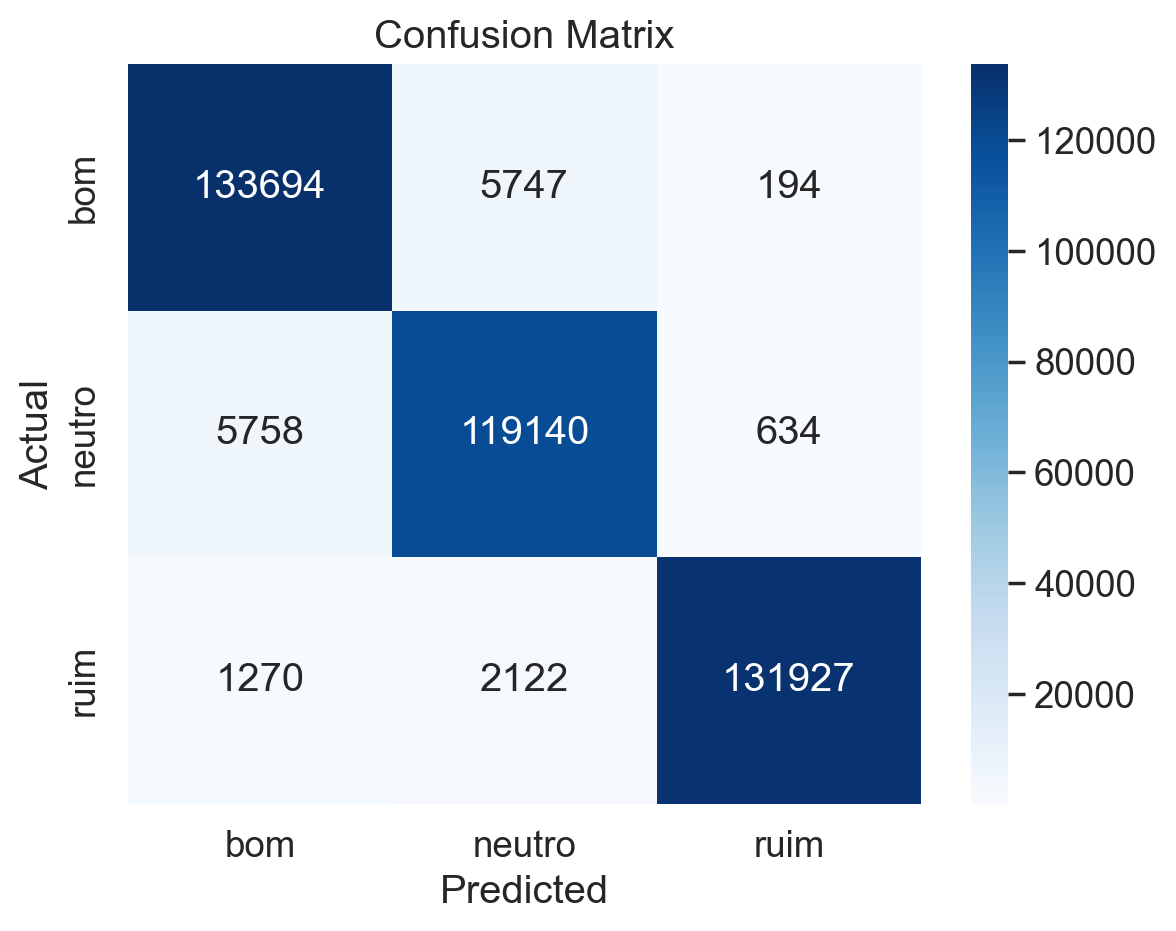

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 10. Fazer previsões sobre o conjunto de teste
y_pred = classifier.predict(X_test_tfidf)

# 11. Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definir os rótulos em inglês (ajustar para refletir as classes presentes)
labels_en = np.unique(y_test)  # Obter rótulos únicos de y_test

# 12. Exibir a matriz de confusão com o padrão visual do primeiro gráfico
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_en, yticklabels=labels_en)
plt.title('Confusion Matrix')  # Título do gráfico
plt.xlabel('Predicted')        # Rótulo do eixo x
plt.ylabel('Actual')           # Rótulo do eixo y
plt.show()


In [24]:
from sklearn.model_selection import cross_val_score
from tabulate import tabulate

# Executar validação cruzada no modelo treinado
scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=5)

# Preparar as estatísticas para exibição
statistics = [
    ["Média da Acurácia", f"{scores.mean():.4f}"],
    ["Desvio Padrão da Acurácia", f"{scores.std():.4f}"]
]

# Exibir as estatísticas em uma tabela formatada
print(tabulate(statistics, headers=["Estatística", "Valor"], tablefmt="grid"))



c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

+---------------------------+---------+
| Estatística               |   Valor |
+===========================+=========+
| Média da Acurácia         |  0.9614 |
+---------------------------+---------+
| Desvio Padrão da Acurácia |  0.0001 |
+---------------------------+---------+


In [25]:
from sklearn.metrics import accuracy_score

# Fazer previsões sobre o conjunto de teste
y_pred = classifier.predict(X_test_tfidf)

# Calcular e exibir a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")



Acurácia do modelo: 0.9607


In [26]:
from sklearn.metrics import classification_report

# Gerar o relatório de métricas (precisão, recall, F1-score e suporte)
report = classification_report(y_test, y_pred, target_names=['ruim', 'neutro', 'bom'])

# Exibir o relatório
print("Relatório de Métricas:\n")
print(report)


Relatório de Métricas:

              precision    recall  f1-score   support

        ruim       0.95      0.96      0.95    139635
      neutro       0.94      0.95      0.94    125532
         bom       0.99      0.97      0.98    135319

    accuracy                           0.96    400486
   macro avg       0.96      0.96      0.96    400486
weighted avg       0.96      0.96      0.96    400486



C:\Users\Vinicius\AppData\Local\Temp\ipykernel_9536\4283286216.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


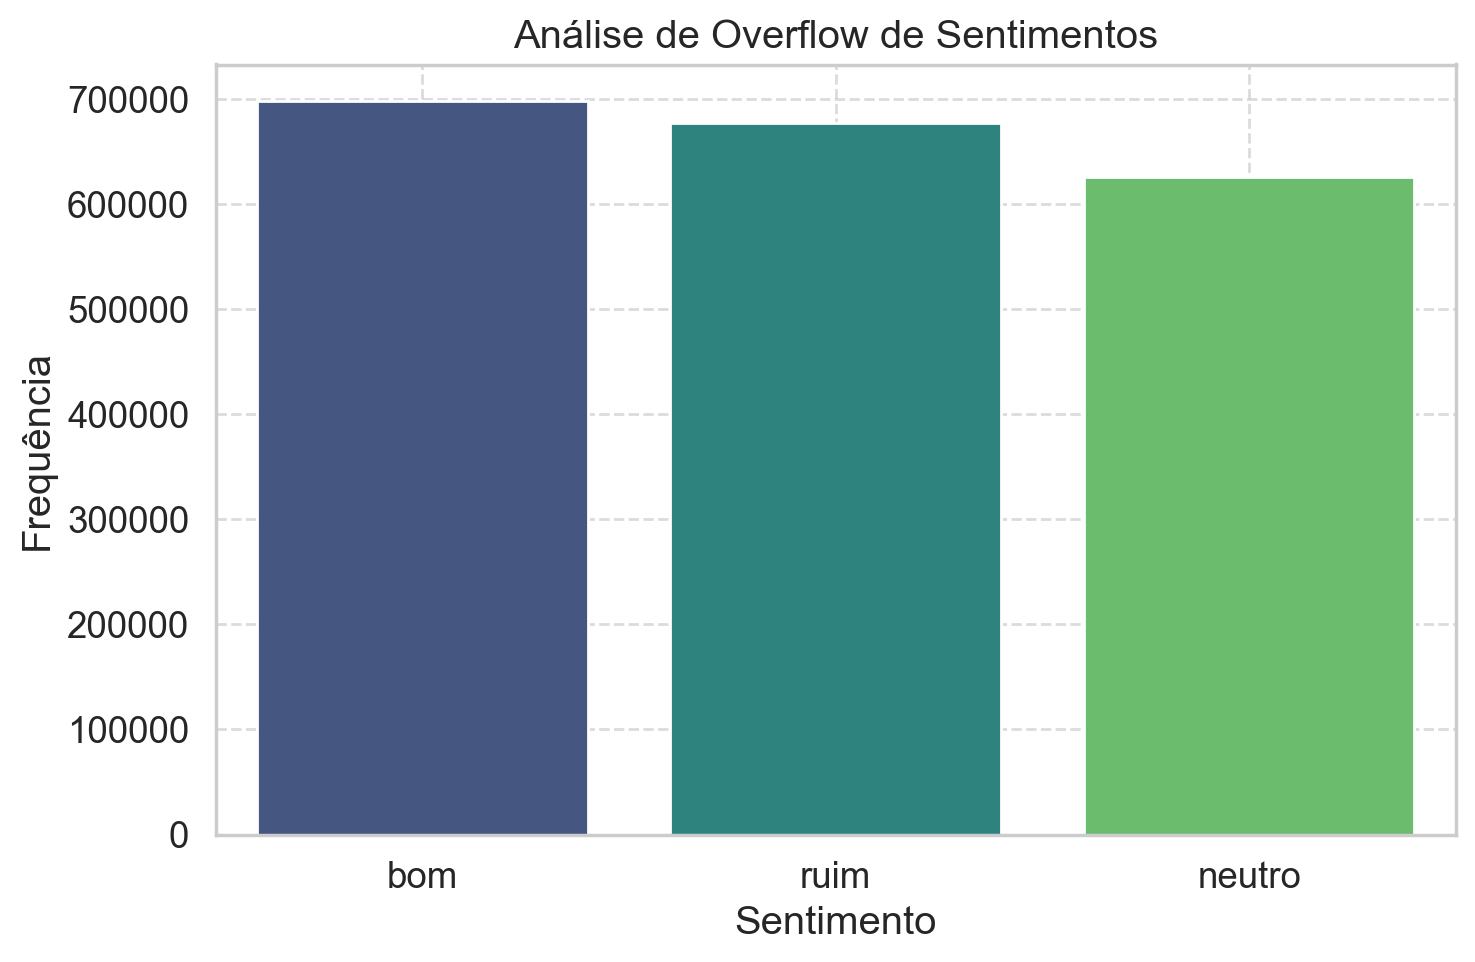

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os arquivos CSV
app_reviews_df1 = pd.read_csv('app_reviews_filtered.csv')  # Primeiro CSV
app_reviews_df2 = pd.read_csv('sentimentos.csv')           # Segundo CSV

# 2. Concatenar os DataFrames
app_reviews_df = pd.concat([app_reviews_df1, app_reviews_df2], ignore_index=True)

# 3. Remover valores NaN na coluna 'content'
app_reviews_df.dropna(subset=['content'], inplace=True)

# 4. Contagem de cada categoria de sentimento ('ruim', 'neutro', 'bom')
sentiment_counts = app_reviews_df['score'].value_counts()

# 5. Exibir o gráfico de barras para análise de overflow
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Análise de Overflow de Sentimentos')
plt.xlabel('Sentimento')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the 

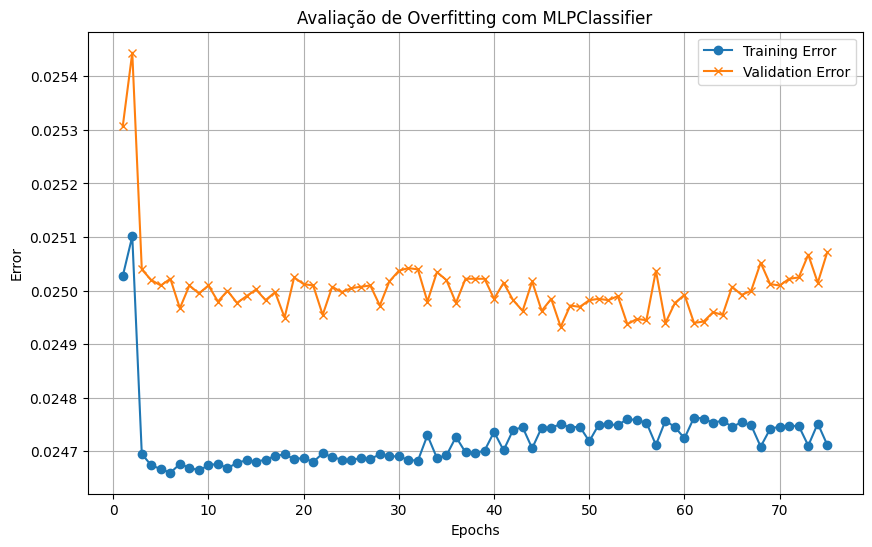

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# 1. Carregar e processar os dados
app_reviews_df1 = pd.read_csv('app_reviews_filtered.csv')
app_reviews_df2 = pd.read_csv('sentimentos.csv')
app_reviews_df = pd.concat([app_reviews_df1, app_reviews_df2], ignore_index=True)
app_reviews_df.dropna(subset=['content'], inplace=True)

# 2. Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    app_reviews_df['content'], app_reviews_df['score'], test_size=0.2, random_state=42
)

# 3. Vetorização do texto na coluna 'content'
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 4. Inicializar o classificador MLP com várias épocas
classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1, warm_start=True, random_state=42)

# 5. Simulação de épocas com monitoramento de erros
n_epochs = 75
train_accuracies = []
val_accuracies = []

for epoch in range(1, n_epochs + 1):
    classifier.fit(X_train_tfidf, y_train)  # Treinamento do modelo por 1 época

    # Prever no conjunto de treinamento e teste
    y_pred_train = classifier.predict(X_train_tfidf)
    y_pred_test = classifier.predict(X_test_tfidf)

    # Armazenar acurácias
    train_accuracies.append(accuracy_score(y_train, y_pred_train))
    val_accuracies.append(accuracy_score(y_test, y_pred_test))

# 6. Calcular e plotar os erros de treinamento e validação
train_errors = [1 - acc for acc in train_accuracies]
val_errors = [1 - acc for acc in val_accuracies]

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_errors, label='Training Error', marker='o')
plt.plot(range(1, n_epochs + 1), val_errors, label='Validation Error', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Avaliação de Overfitting com MLPClassifier')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
print(app_reviews_df['score'].value_counts())


score
bom       698358
ruim      677736
neutro    626336
Name: count, dtype: int64


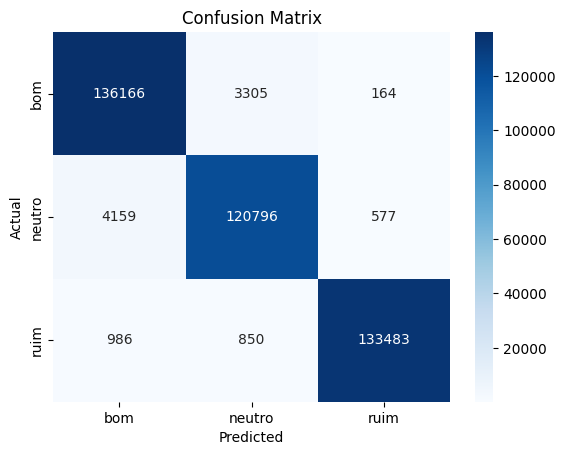

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, classifier.predict(X_test_tfidf))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [4]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=5)
print(f"Acurácias: {scores.mean()} ± {scores.std()}")


c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Vinicius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the 

Acurácias: 0.9735983281050498 ± 0.00041386485715481594


In [89]:
#!pip install tabulate -q

In [ ]:

from sklearn.model_selection import cross_val_score
from tabulate import tabulate

# Executar validação cruzada
scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=5)

# Preparar os dados para exibição
results = [
    ["Fold " + str(i + 1), f"{score:.4f}"] for i, score in enumerate(scores)
]
results.append(["Média", f"{scores.mean():.4f}"])
results.append(["Desvio Padrão", f"{scores.std():.4f}"])

# Exibir os resultados em uma tabela
print(tabulate(results, headers=["Validação", "Acurácia"], tablefmt="grid"))


In [ ]:
import re

# Função para ler o conteúdo do arquivo linha por linha
def ler_arquivo_linhas(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        linhas = file.readlines()
    return linhas

# Função para analisar o sentimento de cada bloco de texto no formato SRT e gerar um novo arquivo
def gerar_arquivo_com_sentimentos(input_file, output_file, tfidf_vectorizer, classifier):
    linhas = ler_arquivo_linhas(input_file)
    with open(output_file, 'w', encoding='utf-8') as file_out:
        bloco_texto = []
        for linha in linhas:
            if re.match(r'^\d+$', linha.strip()):  # Ignora o número da sequência
                bloco_texto.append(linha)  # Mantém o número da sequência no arquivo
            elif re.match(r'^\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}$', linha.strip()):  # Linha de tempo
                bloco_texto.append(linha)  # Mantém a linha de tempo no arquivo
            elif linha.strip() == '':  # Bloco finalizado
                if bloco_texto:
                    bloco_texto_junto = ' '.join(bloco_texto[2:]).strip()  # Ignora as duas primeiras linhas (número e tempo)
                    if bloco_texto_junto:
                        texto_tfidf = tfidf_vectorizer.transform([bloco_texto_junto])
                        sentimento = classifier.predict(texto_tfidf)[0]  # Usa o modelo treinado
                        bloco_texto.append(f"[{sentimento}]\n")  # Adiciona a análise de sentimento
                    file_out.write(''.join(bloco_texto))  # Escreve o bloco no arquivo de saída
                    bloco_texto = []  # Reinicia o bloco
            else:
                bloco_texto.append(linha)  # Continua montando o bloco com o texto

        # Escreve o último bloco, caso o arquivo não tenha finalizado com uma linha em branco
        if bloco_texto:
            bloco_texto_junto = ' '.join(bloco_texto[2:]).strip()  # Ignora as duas primeiras linhas (número e tempo)
            if bloco_texto_junto:
                texto_tfidf = tfidf_vectorizer.transform([bloco_texto_junto])
                sentimento = classifier.predict(texto_tfidf)[0]
                bloco_texto.append(f"[{sentimento}]\n")
            file_out.write(''.join(bloco_texto))

# Nome do arquivo de entrada e saída
input_file = 'finalizado.txt'  # Caminho do arquivo de entrada
output_file = "analise_sentimento_tempos_modelo.txt"  # Caminho do arquivo de saída

# Chamada da função com objetos treinados
gerar_arquivo_com_sentimentos(input_file, output_file, tfidf_vectorizer, classifier)

# Exibir uma mensagem confirmando o sucesso da operação
print(f"Análise de sentimento concluída. Verifique o arquivo: {output_file}")


In [ ]:
# Mover os arquivos para a pasta de Downloads no sistema operacional
download_dir = os.path.expanduser("~/Downloads")  # Diretório de downloads do sistema
os.rename(csv_filename, os.path.join(download_dir, "app_reviews_filtered.csv"))
os.rename(xlsx_filename, os.path.join(download_dir, "app_reviews_filtered.xlsx"))
print(f"Arquivos movidos para a pasta de downloads: {download_dir}")